### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r"C:\Users\ainao\OneDrive\Project\Fraud detection system\DATA\Train.csv")
test_df = pd.read_csv(r"C:\Users\ainao\OneDrive\Project\Fraud detection system\DATA\Test.csv")

In [3]:
len(test_df), len(train_df)

(23634, 1472952)

In [4]:
train_df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [5]:
train_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [6]:
len(train_df)

1472952

In [7]:
train_df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [9]:
train_df["Is Fraudulent"].value_counts()

Is Fraudulent
0    1399114
1      73838
Name: count, dtype: int64

In [10]:
train_df.isna().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [11]:
pd.crosstab(train_df["Payment Method"], train_df["Is Fraudulent"])

Is Fraudulent,0,1
Payment Method,,
PayPal,349491,18477
bank transfer,349718,18560
credit card,350116,18313
debit card,349789,18488


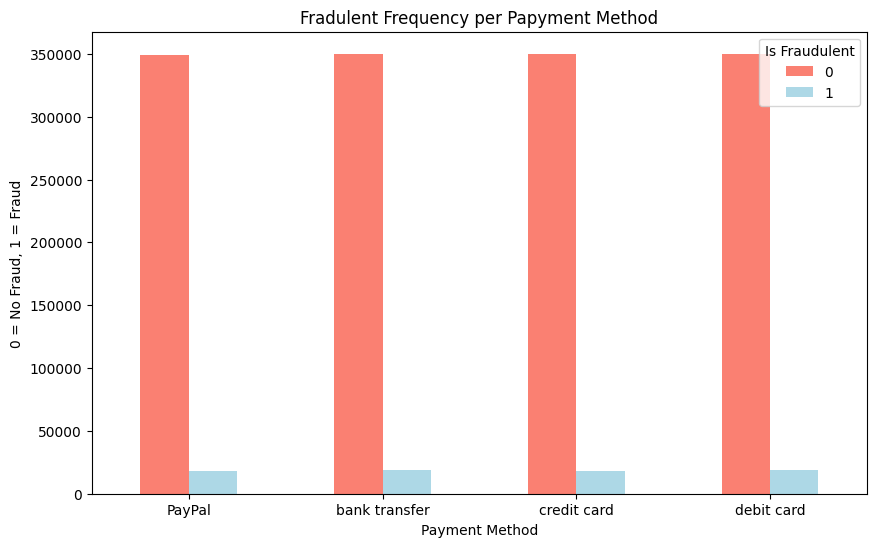

In [12]:
pd.crosstab(train_df["Payment Method"],train_df["Is Fraudulent"]).plot(kind="bar",
                                                                        figsize=(10,6),
                                                                        color=["salmon", "lightblue"])


plt.title("Fradulent Frequency per Papyment Method")
plt.xlabel("Payment Method")
plt.ylabel("0 = No Fraud, 1 = Fraud")
plt.xticks(rotation=0);

In [13]:
pd.crosstab(train_df["Product Category"], train_df["Is Fraudulent"])

Is Fraudulent,0,1
Product Category,,
clothing,279508,14811
electronics,280668,14626
health & beauty,280546,14821
home & garden,278980,14726
toys & games,279412,14854


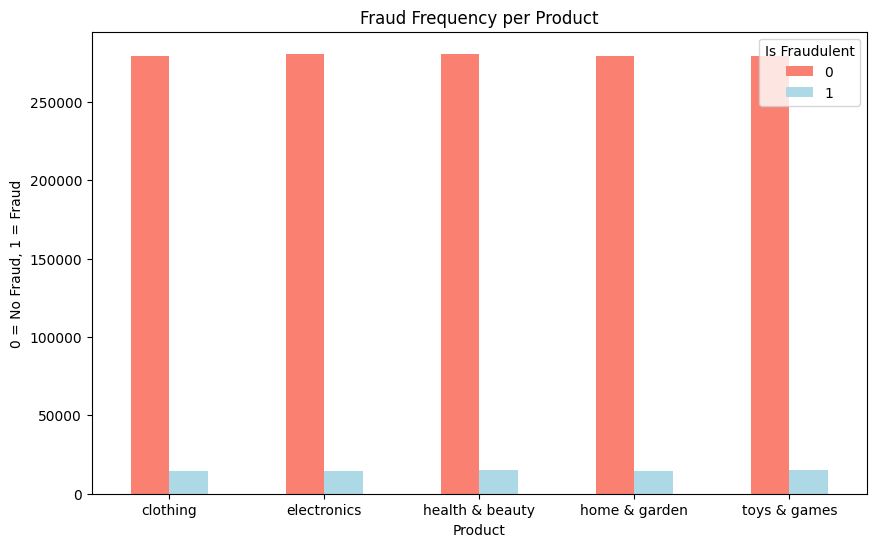

In [14]:
pd.crosstab(train_df["Product Category"], train_df["Is Fraudulent"]).plot(kind="bar",
                                                                          figsize=(10,6),
                                                                          color=["salmon", "lightblue"]
                                                                          )

plt.title("Fraud Frequency per Product")
plt.xlabel("Product")
plt.ylabel("0 = No Fraud, 1 = Fraud")
plt.xticks(rotation=0);

Age vs Fraud Rate

In [15]:
train_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


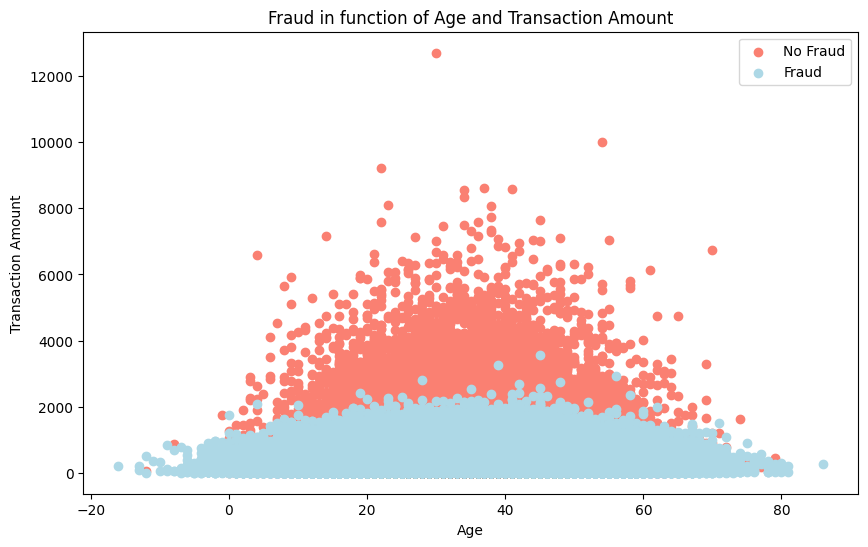

In [16]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter 
age = train_df["Customer Age"]
amount = train_df["Transaction Amount"]
plt.scatter(age[train_df["Is Fraudulent"]==1],
            amount[train_df["Is Fraudulent"]==1],
            c="salmon")

plt.scatter(age[train_df["Is Fraudulent"]==0],
            amount[train_df["Is Fraudulent"]==0],
            c=["lightblue"])

plt.title("Fraud in function of Age and Transaction Amount")
plt.xlabel("Age")
plt.ylabel("Transaction Amount")
plt.legend(["No Fraud", "Fraud"])

c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


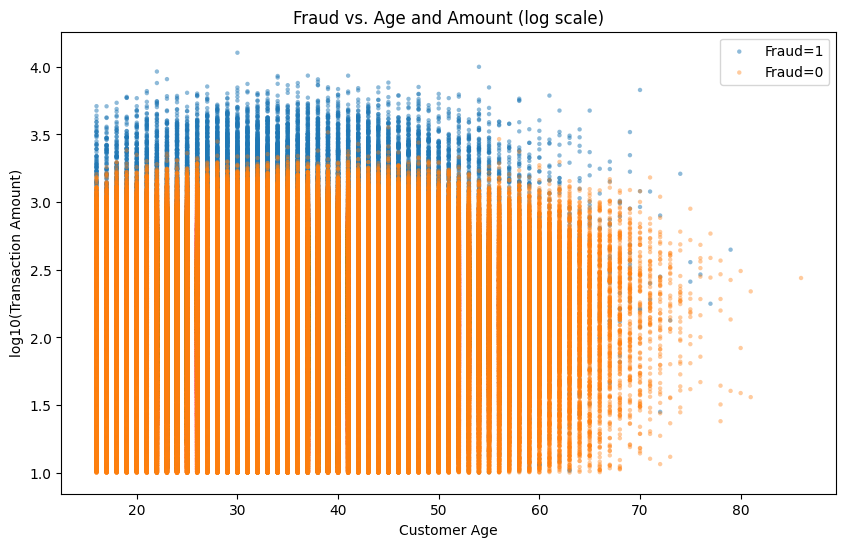

C:\Users\ainao\AppData\Local\Temp\ipykernel_13660\3658664656.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rate = df.pivot_table(values="Is Fraudulent", index=age_bins, columns=amt_bins, aggfunc="mean")


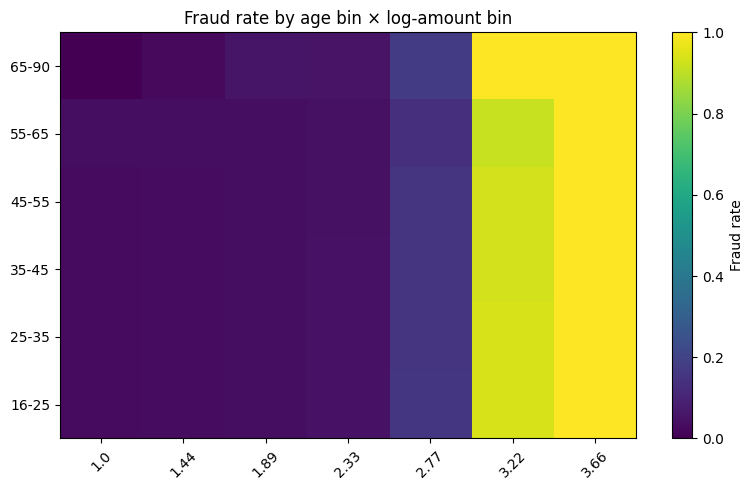

In [17]:
# 1) Clean and log-scale for visibility
mask_valid = train_df["Customer Age"].between(16, 90)
df = train_df.loc[mask_valid].copy()
df["log_amount"] = np.log10(df["Transaction Amount"].clip(lower=1))

# 2) Clearer scatter
plt.figure(figsize=(10,6))
for lab, color, alpha in [(1,"salmon",0.5),(0,"lightblue",0.4)]:
    m = df["Is Fraudulent"]==lab
    plt.scatter(df.loc[m,"Customer Age"], df.loc[m,"log_amount"],
                s=10, alpha=alpha, label=f"Fraud={lab}", edgecolors="none")
plt.xlabel("Customer Age"); plt.ylabel("log10(Transaction Amount)")
plt.legend(); plt.title("Fraud vs. Age and Amount (log scale)")
plt.show()

# 3) Fraud rate heatmap by bins (age × amount)
age_bins = pd.cut(df["Customer Age"], bins=[16,25,35,45,55,65,90])
amt_bins = pd.cut(df["log_amount"], bins=np.linspace(df["log_amount"].min(), df["log_amount"].max(), 8))
rate = df.pivot_table(values="Is Fraudulent", index=age_bins, columns=amt_bins, aggfunc="mean")
plt.figure(figsize=(8,5))
plt.imshow(rate, aspect="auto", origin="lower")
plt.xticks(range(rate.shape[1]), [c.left.round(2) for c in rate.columns], rotation=45)
plt.yticks(range(rate.shape[0]), [f"{i.left:.0f}-{i.right:.0f}" for i in rate.index.categories])
plt.colorbar(label="Fraud rate")
plt.title("Fraud rate by age bin × log-amount bin")
plt.tight_layout(); plt.show()


Feature Engineering

In [18]:
import numpy as np
import pandas as pd

def convert_and_engineer(df):
    df = df.copy()

    #  convert to numeric
    df['Transaction Amount'] = pd.to_numeric(df['Transaction Amount'], errors='coerce')
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
    df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')
    df['Account Age Days'] = pd.to_numeric(df['Account Age Days'], errors='coerce')
    df['Transaction Hour'] = pd.to_numeric(df.get('Transaction Hour'), errors='coerce')  # if present
    df['Is Fraudulent'] = pd.to_numeric(df['Is Fraudulent'], errors='coerce').fillna(0).astype(int)

    # datetime part
    dt = pd.to_datetime(df['Transaction Date'], errors='coerce')
    df['tx_year']  = dt.dt.year
    df['tx_month'] = dt.dt.month
    df['tx_dow']   = dt.dt.dayofweek
    df['tx_hour']  = dt.dt.hour

    # amounts
    df['Is Refund'] = (df['Transaction Amount'] < 0).astype(int)
    df['Log Abs Transaction Amount'] = np.log1p(df['Transaction Amount'].abs())
    df['Amount Bin'] = pd.qcut(df['Transaction Amount'], q=4, labels=False, duplicates='drop')

    # time features
    # Falls back to provided Transaction Hour if tx_hour is NA
    hour = df['tx_hour'].where(df['tx_hour'].notna(), df['Transaction Hour'])
    # keep only 0–23 outside becomes NaN
    hour = hour.where((hour >= 0) & (hour <= 23))
    df['Hour Bin'] = pd.cut(hour, bins=[0, 6, 12, 18, 24], right=False, include_lowest=True, labels=False)

    df['Day of Week'] = df['tx_dow']
    df['Is Weekend'] = df['Day of Week'].isin([5, 6]).astype(int)

    # address check (normalized)
    bill = df['Billing Address'].fillna('').astype(str).str.strip().str.lower()
    ship = df['Shipping Address'].fillna('').astype(str).str.strip().str.lower()
    df['Address Mismatch'] = (ship != bill).astype(int)

    # customer behaviour
    df['Amount per Item'] = df['Transaction Amount'] / df['Quantity'].replace(0, np.nan)
    df['Age Amount Interaction'] = df['Customer Age'] * df['Transaction Amount']
    df['Account Age Bin'] = pd.qcut(df['Account Age Days'], q=4, labels=False, duplicates='drop')

    # IP feature (validated first octet)
    def first_octet(ip):
        if not isinstance(ip, str) or '.' not in ip:
            return np.nan
        part = ip.split('.', 1)[0]
        if not part.isdigit():
            return np.nan
        val = int(part)
        return val if 0 <= val <= 255 else np.nan

    df['IP First Octet'] = df['IP Address'].apply(first_octet)

    # simple risk flags 
    q95 = df['Transaction Amount'].quantile(0.95)
    df['High Value Transaction'] = (df['Transaction Amount'] > q95).astype(int)
    df['New Account'] = (df['Account Age Days'] < 30).astype(int)

    return df



In [19]:
converted_df = convert_and_engineer(train_df)
converted_test = convert_and_engineer(test_df)
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Transaction ID              1472952 non-null  object 
 1   Customer ID                 1472952 non-null  object 
 2   Transaction Amount          1472952 non-null  float64
 3   Transaction Date            1472952 non-null  object 
 4   Payment Method              1472952 non-null  object 
 5   Product Category            1472952 non-null  object 
 6   Quantity                    1472952 non-null  int64  
 7   Customer Age                1472952 non-null  int64  
 8   Customer Location           1472952 non-null  object 
 9   Device Used                 1472952 non-null  object 
 10  IP Address                  1472952 non-null  object 
 11  Shipping Address            1472952 non-null  object 
 12  Billing Address             1472952 non-null  object 
 1

In [20]:
converted_df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,...,Hour Bin,Day of Week,Is Weekend,Address Mismatch,Amount per Item,Age Amount Interaction,Account Age Bin,IP First Octet,High Value Transaction,New Account
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,...,0,1,0,0,58.090,987.53,0,212,0,0
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,...,1,6,1,0,194.980,15598.40,0,208,0,0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,...,0,0,0,0,67.095,2952.18,0,76,0,0
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,...,3,5,1,0,45.234,7011.27,1,207,0,0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,...,0,0,0,0,60.765,6198.03,1,190,0,0


In [21]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Transaction ID              1472952 non-null  object 
 1   Customer ID                 1472952 non-null  object 
 2   Transaction Amount          1472952 non-null  float64
 3   Transaction Date            1472952 non-null  object 
 4   Payment Method              1472952 non-null  object 
 5   Product Category            1472952 non-null  object 
 6   Quantity                    1472952 non-null  int64  
 7   Customer Age                1472952 non-null  int64  
 8   Customer Location           1472952 non-null  object 
 9   Device Used                 1472952 non-null  object 
 10  IP Address                  1472952 non-null  object 
 11  Shipping Address            1472952 non-null  object 
 12  Billing Address             1472952 non-null  object 
 1

In [22]:
converted_df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour', 'tx_year', 'tx_month', 'tx_dow',
       'tx_hour', 'Is Refund', 'Log Abs Transaction Amount', 'Amount Bin',
       'Hour Bin', 'Day of Week', 'Is Weekend', 'Address Mismatch',
       'Amount per Item', 'Age Amount Interaction', 'Account Age Bin',
       'IP First Octet', 'High Value Transaction', 'New Account'],
      dtype='object')

In [23]:
# columns to exclude to avoid leakage
leak_cols = ["Transaction ID","Customer ID","IP Address",
                 "Shipping Address","Billing Address"]

df = converted_df.drop(columns=leak_cols, axis=1)
df_test = converted_test.drop(columns=leak_cols, axis=1)

In [36]:
# Using Only 200k dataset for this Project
X_train_x = df.drop("Is Fraudulent", axis=1)[:200000]
y_train_y = df["Is Fraudulent"][:200000]
X_test = df_test.drop("Is Fraudulent", axis=1) 
y_test = df_test["Is Fraudulent"]

In [37]:
X_train_x.shape, y_train_y.shape, X_test.shape,y_test.shape

((200000, 27), (200000,), (23634, 27), (23634,))

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, classification_report, confusion_matrix, average_precision_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_score

In [ ]:

num_cols = X_train_x.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train_x.select_dtypes(include=["object","category","bool"]).columns.tolist()

preprocess = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", num_cols),
    ])


X_train, X_val, y_train, y_val = train_test_split(X_train_x,y_train_y,test_size=0.2,stratify=y_train_y, random_state=42)
y_arr = np.asarray(y_train).astype(int).ravel()
neg, pos = np.bincount(y_arr, minlength=2)[:2]
spw = neg / max(pos, 1)


In [28]:
preprocess

ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['Transaction Date', 'Payment Method',
                                  'Product Category', 'Customer Location',
                                  'Device Used']),
                                ('num', 'passthrough',
                                 ['Transaction Amount', 'Quantity',
                                  'Customer Age', 'Account Age Days',
                                  'Transaction Hour', 'tx_year', 'tx_month',
                                  'tx_dow', 'tx_hour', 'Is Refund',
                                  'Log Abs Transaction Amount', 'Amount Bin',
                                  'Hour Bin', 'Day of Week', 'Is Weekend',
                                  'Address Mismatch', 'Amount per Item',
                                  'Age Amount Interaction', 'Account Age Bin',
                                  'IP First Octet', 'High Value Transaction',
                                  'New Account'])])

In [ ]:
# Logistic Regression
lr = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(
    max_iter=1000, class_weight="balanced"))
])

# Random Forest
rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(class_weight="balanced",))
])

# XGBoost 
xgb = Pipeline([
    ("prep", preprocess),
    ("clf", XGBClassifier(scale_pos_weight=spw))
])


# CatBoost
catboost =Pipeline([
    ("prep", preprocess),
    ("clf", CatBoostClassifier(scale_pos_weight=spw,verbose=False))
])

In [30]:
from sklearn.metrics import average_precision_score, roc_auc_score
from tqdm.auto import tqdm
import numpy as np
models = {
    "Logistic":     lr,
    "RandomForest": rf,
    "XGBoost":      xgb,
    "CatBoost":     catboost,
}

def fit_and_score(models, X_train, X_val, y_train, y_val):
    np.random.seed(42)
    model_scores, pr_auc_dict, roc_auc_dict = {}, {}, {}

    for name, model in tqdm(models.items(), desc="Training & scoring"):
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_val, y_val)

        # Simple scoring block
        try:
            y_score = model.predict_proba(X_val)[:, 1]
        except AttributeError:
            try:
                y_score = model.decision_function(X_val)
            except AttributeError:
                y_score = model.predict(X_val)

        pr_auc_dict[name]  = average_precision_score(y_val, y_score)
        roc_auc_dict[name] = roc_auc_score(y_val, y_score)

    return model_scores, pr_auc_dict, roc_auc_dict


c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
model_scores, pr_auc, roc_auc = fit_and_score(
    models=models,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val
)
model_scores, pr_auc, roc_auc


Training & scoring:   0%|          | 0/4 [00:00<?, ?it/s]c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training & scoring: 100%|██████████| 4/4 [32:36<00:00, 489.07s/it]


({'Logistic': 0.863875,
  'RandomForest': 0.95855,
  'XGBoost': 0.8902,
  'CatBoost': 0.8875},
 {'Logistic': 0.5404713609472195,
  'RandomForest': 0.5203451828459534,
  'XGBoost': 0.5836057173546141,
  'CatBoost': 0.5998031030275908},
 {'Logistic': 0.8219777404485392,
  'RandomForest': 0.8396408659686996,
  'XGBoost': 0.8477887269285821,
  'CatBoost': 0.8504648267742295})

Text(0.5, 1.0, 'Model comparison')

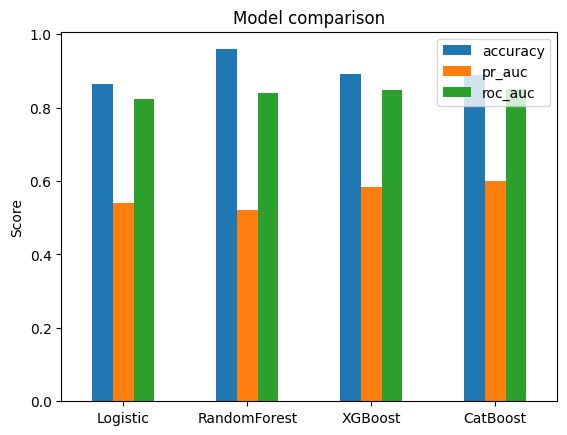

In [32]:
# Model Compare
model_compare = pd.DataFrame({
    "accuracy": model_scores,
    "pr_auc": pr_auc,
    "roc_auc": roc_auc
})

# Plot
ax = model_compare.plot.bar(rot=0)
ax.set_ylabel("Score")
ax.set_title("Model comparison")


Top 3 Models based on PR AUC:
* Catbbost (best PR AUC, good ROC AUC)
* XGBoost (2nd best PR AUC, good ROC AUC)
* Logistic Regression (slightly lower PR AUC but strong ROC AUC)

Hyperparameter tuning Using RandomizedSearch CV for the best 3 models

In [39]:
import numpy as np
from scipy.stats import randint, uniform, loguniform

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, average_precision_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# scorer & CV
pr_auc_scorer = make_scorer(average_precision_score, needs_threshold=True)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# class imbalance helper (pos: 1)
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
scale_pos_weight = (neg / max(pos, 1)) 


In [44]:
# Logistic Regression

log_reg = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(solver="saga", max_iter=1000, n_jobs=-1, random_state=42)),
])

param_spaces = {
    "clf__C": loguniform(1e-3, 1e3),
     "clf__penalty": ["l2"],
     "clf__class_weight": [None, "balanced"],
     "clf__tol": loguniform(1e-4,1e-2),
    }

log_reg_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_spaces,
    n_iter=20,                 # a bit higher to cover both spaces
    scoring="average_precision",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

log_reg_search.fit(X_train, y_train)
best_log_reg = log_reg_search.best_estimator_
best_log_reg_pr_auc = log_reg_search.best_score_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [57]:
log_reg_search.score(X_val, y_val)

0.2820719124761036

In [45]:
#XGBoost
pipe_xgb = Pipeline(steps=[
    ("prep", preprocess),
    ("clf",  XGBClassifier(
        objective="binary:logistic",
        eval_metric="aucpr",
        tree_method="hist",
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False
    ))
])

param_xgb = {
    "clf__n_estimators": randint(200, 600),
    "clf__learning_rate": loguniform(0.02, 0.2),
    "clf__max_depth": randint(3, 7),
    "clf__subsample": uniform(0.7, 0.3),     
    "clf__colsample_bytree": uniform(0.7, 0.3),  
    "clf__min_child_weight": randint(1, 6),
    "clf__gamma": loguniform(1e-4, 1.0),
    "clf__reg_alpha": loguniform(1e-4, 5.0),
    "clf__reg_lambda": loguniform(1e-4, 5.0),
    "clf__scale_pos_weight": [0.5*scale_pos_weight, scale_pos_weight, 2*scale_pos_weight, 1.0],
}

search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_xgb,
    n_iter=25,
    scoring=pr_auc_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search_xgb.fit(X_train, y_train)
best_xgb = search_xgb.best_estimator_
best_xgb_pr_auc = search_xgb.best_score_


Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [58]:
y_val_pred = search_xgb.best_estimator_.predict_proba(X_val)[:, 1]
xgb_val = average_precision_score(y_val, y_val_pred)
xgb_val

0.58392084741772

In [46]:
#Catboost

pipe_cat = Pipeline(steps=[
    ("prep", preprocess),
    ("clf",  CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="PRAUC",
        random_seed=42,
        verbose=False
    ))
])

param_cat = {
    "clf__iterations": randint(300, 800),
    "clf__learning_rate": loguniform(0.02, 0.2),
    "clf__depth": randint(4, 8),
    "clf__l2_leaf_reg": loguniform(0.1, 5),
    "clf__subsample": uniform(0.7, 0.3),
    "clf__border_count": randint(64, 128),
    "clf__scale_pos_weight": [0.5*scale_pos_weight, scale_pos_weight, 2*scale_pos_weight, 1.0],
}

search_cat = RandomizedSearchCV(
    estimator=pipe_cat,
    param_distributions=param_cat,
    n_iter=25,
    scoring=pr_auc_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search_cat.fit(X_train, y_train)
best_cat = search_cat.best_estimator_
best_cat_pr_auc = search_cat.best_score_


Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\ainao\anaconda3\envs\fraud\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  warnings.warn(


In [56]:
y_val_pred = search_cat.best_estimator_.predict_proba(X_val)[:, 1]
cat_val = average_precision_score(y_val, y_val_pred)
cat_val

0.5983182867553766

* Best Model is Catboost
* For better Optimized model, I can increase the paramters or Use GridSearchCV to hypertune the model

In [59]:
search_cat.best_params_

{'clf__border_count': 102,
 'clf__depth': 7,
 'clf__iterations': 648,
 'clf__l2_leaf_reg': 0.20495107742294383,
 'clf__learning_rate': 0.1204262037029521,
 'clf__scale_pos_weight': 9.442828734775043,
 'clf__subsample': 0.7468055921327309}

Evaluate the best params  on test data

In [60]:
from sklearn.base import clone

chosen = {
    "clf__border_count": 102,
    "clf__depth": 7,
    "clf__iterations": 648,
    "clf__l2_leaf_reg": 0.20495107742294383,
    "clf__learning_rate": 0.1204262037029521,
    "clf__scale_pos_weight": 9.442828734775043,
    "clf__subsample": 0.7468055921327309,
}

In [61]:
final_cat = clone(pipe_cat).set_params(**chosen)

In [62]:
final_cat

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transaction Date',
                                                   'Payment Method',
                                                   'Product Category',
                                                   'Customer Location',
                                                   'Device Used']),
                                                 ('num', 'passthrough',
                                                  ['Transaction Amount',
                                                   'Quantity', 'Customer Age',
                                                   'Account Age Days',
                                                   'Transaction Hour',
                                                   'tx_year', 'tx_month',
                                                   'tx_dow', 'tx_hour',
                                                   'Is Refund',
                                                   'Log Abs Transaction Amount',
                                                   'Amount Bin', 'Hour Bin',
                                                   'Day of Week', 'Is Weekend',
                                                   'Address Mismatch',
                                                   'Amount per Item',
                                                   'Age Amount Interaction',
                                                   'Account Age Bin',
                                                   'IP First Octet',
                                                   'High Value Transaction',
                                                   'New Account'])])),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x0000023A63330790>)])

In [64]:
final_cat.fit(X_train, y_train) 
y_preds = final_cat.predict(X_test)

In [65]:
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
23629    0
23630    0
23631    0
23632    0
23633    0
Name: Is Fraudulent, Length: 23634, dtype: int32

ROC-AUC  and PR-AUC Curve

Validation ROC-AUC: 0.8104
Validation PR-AUC (AP): 0.2425


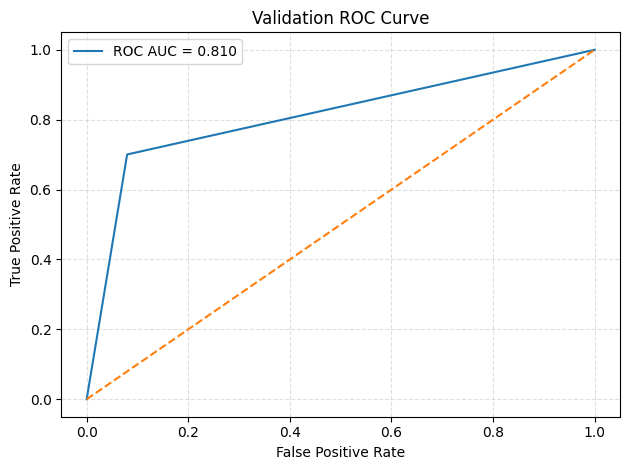

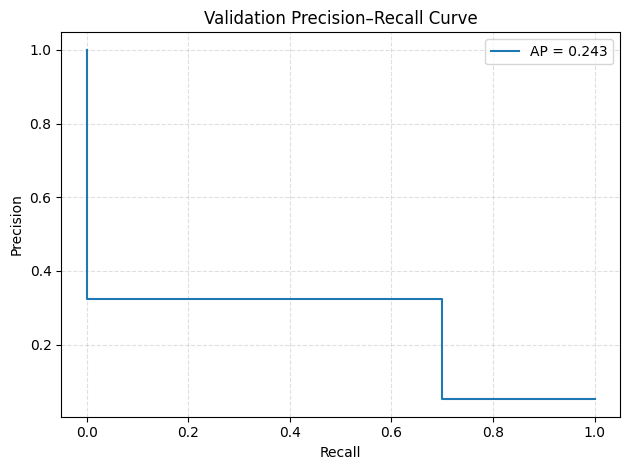

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

#Predict probabilities
#val_preds = catb.predict(X_val)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation ROC Curve")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

# Precision–Recall (PR) curve
precision, recall, _ = precision_recall_curve(y_test, y_preds)
ap = average_precision_score(y_test, y_preds)

plt.figure()
# step plot is standard for PR curves
plt.step(recall, precision, where="post", label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Validation Precision–Recall Curve")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

print(f"Validation ROC-AUC: {roc_auc:.4f}")
print(f"Validation PR-AUC (AP): {ap:.4f}")

Create Confusion Matrix

In [68]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20627  1785]
 [  366   856]]


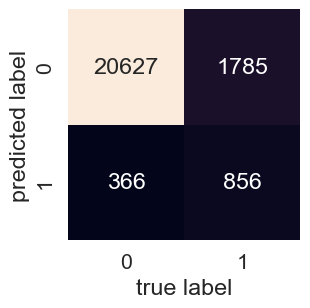

In [ ]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.4) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                      fmt="d", 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Classification Report

In [70]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22412
           1       0.32      0.70      0.44      1222

    accuracy                           0.91     23634
   macro avg       0.65      0.81      0.70     23634
weighted avg       0.95      0.91      0.92     23634



In [71]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [78]:
results = calculate_results(y_test, y_preds)
metrics = pd.DataFrame(results,index=["metrics"])
metrics

,accuracy,precision,recall,f1
metrics,90.898705,0.948521,0.908987,0.924215


Feature Importance

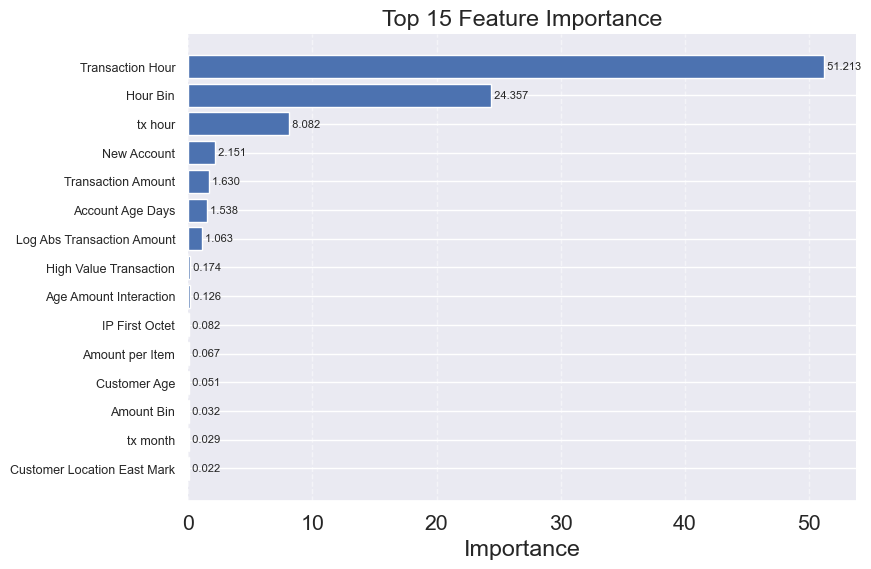

In [88]:
# Nice, compact CatBoost feature-importance plot (top 25)

import matplotlib.pyplot as plt
import pandas as pd
import textwrap

model = final_cat.named_steps["clf"]
names = final_cat.named_steps["prep"].get_feature_names_out()
fi = pd.Series(model.get_feature_importance(), index=names).sort_values(ascending=False).head(15)[::-1]

labels = [textwrap.fill(s.replace("num__", "").replace("ohe__", "").replace("_"," "), 28) for s in fi.index]

plt.figure(figsize=(9,6))
plt.barh(range(len(fi)), fi.values)
plt.yticks(range(len(fi)), labels, fontsize=9)
plt.xlabel("Importance"); plt.title("Top 15 Feature Importance")
plt.grid(axis="x", linestyle="--", alpha=0.5); [plt.gca().spines[s].set_visible(False) for s in ("top","right","left")]
for i,v in enumerate(fi.values): plt.text(v, i, f" {v:.3f}", va="center", ha="left", fontsize=8)
plt.tight_layout(); plt.show()



In [90]:
X_train.head()

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Account Age Days,Transaction Hour,...,Hour Bin,Day of Week,Is Weekend,Address Mismatch,Amount per Item,Age Amount Interaction,Account Age Bin,IP First Octet,High Value Transaction,New Account
80681,76.38,2024-03-16 17:11:05,bank transfer,health & beauty,3,40,Hartside,desktop,282,17,...,2,5,1,0,25.460000,3055.20,3,31,0,0
180293,91.43,2024-03-08 05:17:51,PayPal,electronics,3,37,Griffithberg,tablet,272,5,...,0,4,0,0,30.476667,3382.91,2,212,0,0
92210,101.71,2024-03-20 07:46:46,debit card,electronics,4,49,New Annburgh,desktop,39,7,...,1,2,0,0,25.427500,4983.79,0,149,0,0
136983,384.25,2024-03-22 04:08:32,PayPal,clothing,5,34,Port Davidside,tablet,124,4,...,0,4,0,0,76.850000,13064.50,1,209,0,0
34463,42.45,2024-02-29 12:11:30,credit card,home & garden,1,36,Maryside,mobile,193,12,...,2,3,0,0,42.450000,1528.20,2,20,0,0


SHAP Explanation

C:\Users\ainao\AppData\Local\Temp\ipykernel_13660\1929742929.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(vals, X_plot, feature_names=names, show=True)


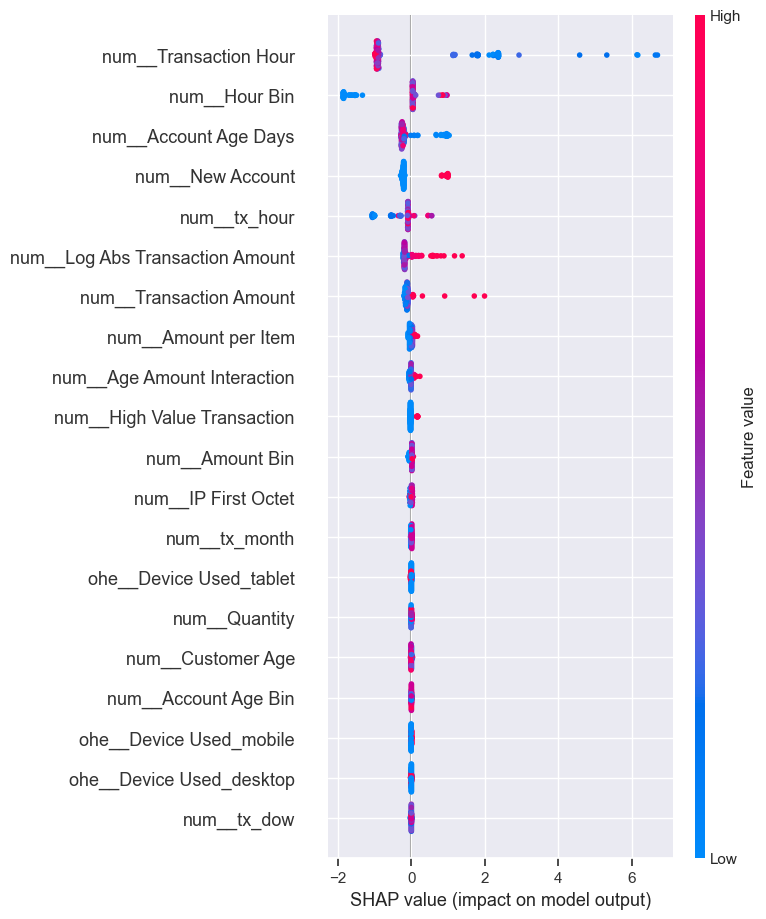

In [ ]:
import numpy as np, shap

# transform plus feature names
X_tx = preprocess.transform(X_test)
names = getattr(preprocess, "get_feature_names_out", lambda: getattr(X_test, "columns", None))()

# sample up to 200
idx = np.random.RandomState(42).choice(X_tx.shape[0], size=min(200, X_tx.shape[0]), replace=False)
X_sub = X_tx[idx]
X_plot = X_sub.toarray() if hasattr(X_sub, "toarray") else X_sub

# use underlying CatBoost model
cat = final_cat.named_steps["clf"] if hasattr(final_cat, "named_steps") else final_cat
explainer = shap.TreeExplainer(cat)
vals = explainer.shap_values(X_sub)
if isinstance(vals, list):  # multiclass -> pick one class to plot
    vals = vals[1] if len(vals)==2 else vals[-1]

shap.summary_plot(vals, X_plot, feature_names=names, show=True)


* The SHAP summary plot above shows that transaction timing **(Transaction Hour and Hour Bin)** and account characteristics **(Account Age Days, New Account)** are the most influential drivers of the model’s fraud predictions. 

* High transaction hours and newer accounts increase the predicted fraud risk. Transaction amount-related features have moderate influence, while device type features contribute less. This helps us understand what the model relies on to flag potential fraud, making the predictions more interpretable.